Load modules

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

Hyper parameter

In [2]:
BATCH_SIZE = 32
INPUT_LENGTH = 32
INPUT_DIM = 1
OUTPUT_SHAPE = 1
HIDDEN_SIZE = 10

### Modeling


Simple RNN

    arguments

    - input_shape : (input_length, input_dim)

    - batch_input_shape = (batch_size, input_length, input_dim)

    - units : output shape

In [3]:
model_simple_rnn = tf.keras.Sequential()
model_simple_rnn.add(layers.SimpleRNN(units  = OUTPUT_SHAPE,
                                      activation = 'relu',
                                      input_shape = (INPUT_LENGTH, INPUT_DIM)))
model_simple_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


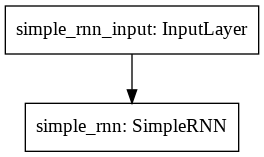

In [4]:
tf.keras.utils.plot_model(model_simple_rnn)

In [5]:
model_simple_rnn2 = tf.keras.Sequential()
model_simple_rnn2.add(layers.SimpleRNN(units  = OUTPUT_SHAPE,
                                       activation = 'relu',
                                       batch_input_shape = (BATCH_SIZE, INPUT_LENGTH, INPUT_DIM)))
model_simple_rnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (32, 1)                   3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


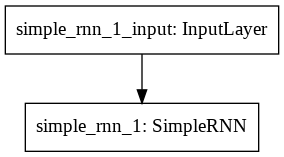

In [6]:
tf.keras.utils.plot_model(model_simple_rnn2)

Deep RNN

    Stacking multi rnn layers

In [7]:
model_deep_rnn = tf.keras.Sequential()
model_deep_rnn.add(layers.SimpleRNN(units = HIDDEN_SIZE,
                                    activation = 'relu',
                                    return_sequences = True,
                                    input_shape = (INPUT_LENGTH, INPUT_DIM)))
model_deep_rnn.add(layers.SimpleRNN(units = OUTPUT_SHAPE,
                                    activation = 'relu',
                                    return_sequences = False))
model_deep_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32, 10)            120       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 12        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


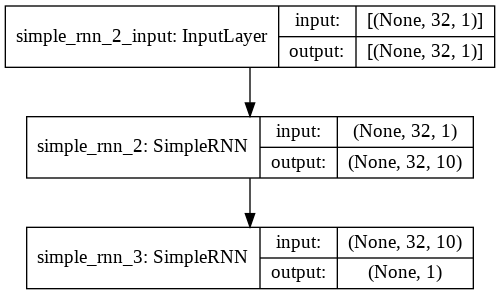

In [8]:
tf.keras.utils.plot_model(model_deep_rnn, show_shapes=True, show_layer_names=True)

In [9]:
model_deep_rnn2 = tf.keras.Sequential()
model_deep_rnn2.add(layers.SimpleRNN(units = HIDDEN_SIZE,
                                    activation = 'relu',
                                    return_sequences = True,
                                    input_shape = (INPUT_LENGTH, INPUT_DIM)))
model_deep_rnn2.add(layers.SimpleRNN(units = OUTPUT_SHAPE,
                                    activation = 'relu',
                                    return_sequences = True))
model_deep_rnn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 32, 10)            120       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32, 1)             12        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


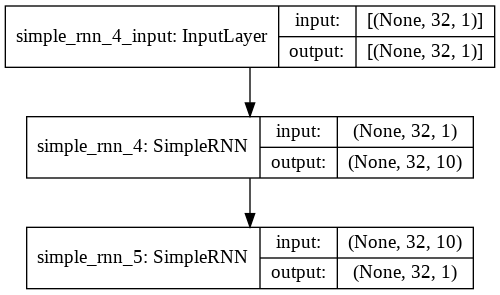

In [10]:
tf.keras.utils.plot_model(model_deep_rnn2, show_shapes=True, show_layer_names=True)

Biderectional RNN

In [11]:
model_bidirectional_rnn = tf.keras.Sequential()
model_bidirectional_rnn.add(layers.Bidirectional(layers.SimpleRNN(units = HIDDEN_SIZE,
                                    activation = 'relu',
                                    return_sequences = True,
                                    input_shape = (INPUT_LENGTH, INPUT_DIM))))
model_bidirectional_rnn.add(layers.Bidirectional(layers.SimpleRNN(units = OUTPUT_SHAPE,
                                    activation = 'relu',
                                    return_sequences = True)))